# The Weather Channel. Predicciones del clima

### Intalación de librerias

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


### Solicitud HTTP a página web

In [4]:
import requests
from bs4 import BeautifulSoup
import datetime

pagina_web = requests.get("https://weather.com/es-MX/tiempo/10dias/l/2a3f97be1555e564e20a615a50c806bd7b185e828246f9471308aa39d0817f04#detailIndex5")
print(pagina_web)

<Response [200]>


<!DOCTYPE html>
<html dir="ltr" lang="es-MX">
 <head>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/>
  <meta content="max-image-preview:large" data-react-helmet="true" name="robots"/>
  <meta content="index, follow" data-react-helmet="true" name="robots"/>
  <meta content="origin" data-react-helmet="true" name="referrer"/>
  <meta content="Prepárate con el pronóstico para los próximos 10 días más preciso para Ciudad Juárez, Chihuahua. Consulta la temperatura máxima y mínima y la probabilidad de lluvia en The Weather Channel y Weather.com" data-react-helmet="true" name="description"/>
  <meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/>
  <meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/>
  <meta content="#ffffff" data-react-helmet="true" name="theme-color"/>
  <meta content
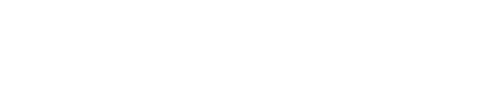
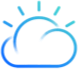

In [5]:
soup = BeautifulSoup(pagina_web.text,"html.parser")
print(soup.prettify())

## Análisis y extracción de información 

### Fecha

In [6]:
lista_fecha = soup.find_all('h3', class_="DetailsSummary--daypartName--kbngc")
fechas = []
for item in lista_fecha:
    fecha = item.text
    fechas.append(fecha)

print(len(fechas))
fechas

15


['Hoy',
 'lun 14',
 'mar 15',
 'mié 16',
 'jue 17',
 'vie 18',
 'sáb 19',
 'dom 20',
 'lun 21',
 'mar 22',
 'mié 23',
 'jue 24',
 'vie 25',
 'sáb 26',
 'dom 27']

### Pronóstico general

In [7]:
lista_pronostico = soup.find_all('span', class_="DetailsSummary--extendedData--307Ax")
print(len(lista_pronostico))
pronostico = []
for item in lista_pronostico:
    valor = item.text
    pronostico.append(valor)
print(len(pronostico))
pronostico

15
15


['Parcialmente nublado',
 'Parcialmente nublado',
 'Soleado',
 'Soleado',
 'Mayormente soleado',
 'Mayormente soleado',
 'Mayormente soleado',
 'Parcialmente nublado',
 'Mayormente soleado',
 'Mayormente soleado',
 'Parcialmente nublado',
 'Parcialmente nublado',
 'Mayormente soleado',
 'Mayormente soleado',
 'Mayormente soleado']

### Temperaturas día y noche

In [8]:
lista_temperaturas_maximas = soup.find_all('span', class_="DetailsSummary--highTempValue--3PjlX")

temperaturas_maximas = []
for item in lista_temperaturas_maximas:
    temperatura = item.text
    temperaturas_maximas.append(temperatura)

print(len(temperaturas_maximas))
temperaturas_maximas


15


['36°',
 '36°',
 '37°',
 '37°',
 '38°',
 '38°',
 '38°',
 '36°',
 '36°',
 '36°',
 '36°',
 '37°',
 '37°',
 '37°',
 '38°']

In [9]:
lista_temperaturas_minimas = soup.find_all('span', class_="DetailsSummary--lowTempValue--2tesQ")

temperaturas_minimas = []
for item in lista_temperaturas_minimas:
    temperatura = item.text
    temperaturas_minimas.append(temperatura)

print(len(temperaturas_minimas))
temperaturas_minimas

15


['24°',
 '24°',
 '25°',
 '25°',
 '25°',
 '25°',
 '25°',
 '24°',
 '24°',
 '24°',
 '24°',
 '24°',
 '24°',
 '24°',
 '25°']

### Probabilidad de lluvia

In [10]:
lista_probabilidad_lluvia = soup.find_all('div', class_="DetailsSummary--precip--1a98O")

probabilidad_lluvias = []
for item in lista_probabilidad_lluvia:
    probabilidad = item.span.text
    probabilidad_lluvias.append(probabilidad)

print(len(probabilidad_lluvias))
probabilidad_lluvias

15


['15%',
 '24%',
 '0%',
 '0%',
 '3%',
 '13%',
 '6%',
 '17%',
 '14%',
 '3%',
 '4%',
 '7%',
 '6%',
 '7%',
 '7%']

### Viento día y noche

In [11]:
lista_viento = soup.find_all("span", class_="Wind--windWrapper--3Ly7c DailyContent--value--1Jers DailyContent--windValue--JPpmk")
print(len(lista_viento))
viento_dia = []
viento_noche = []
vientos = []
a = False
for item in lista_viento:
    viento = item.span.next_sibling.text
    vientos.append(viento)
    if a == False:
        viento_dia.append(viento)
        a = True
    else:
        viento_noche.append(viento)
        a = False
print(vientos)
print(len(viento_dia))
print(viento_dia)
print(len(viento_noche))
print(viento_noche)

30
['19', '16', '29', '28', '21', '21', '11', '12', '12', '14', '16', '17', '17', '22', '21', '23', '21', '22', '20', '21', '19', '21', '17', '19', '15', '18', '16', '17', '14', '17']
15
['19', '29', '21', '11', '12', '16', '17', '21', '21', '20', '19', '17', '15', '16', '14']
15
['16', '28', '21', '12', '14', '17', '22', '23', '22', '21', '21', '19', '18', '17', '17']


In [12]:
lista_viento = soup.find_all("span", class_="Wind--windWrapper--3Ly7c DailyContent--value--1Jers DailyContent--windValue--JPpmk")
print(len(lista_viento))
viento_dia_direccion = []
viento_noche_direccion = []
vientos = []
a = False
for item in lista_viento:
    viento = item.span.text
    vientos.append(viento)
    if a == False:
        viento_dia_direccion.append(viento)
        a = True
    else :
        viento_noche_direccion.append(viento)
        a = False
print(vientos)
print(len(viento_dia_direccion))
print(viento_dia_direccion)
print(len(viento_noche_direccion))
print(viento_noche_direccion)

30
['O ', 'ONO ', 'E ', 'E ', 'ESE ', 'ESE ', 'SE ', 'SE ', 'SSE ', 'E ', 'SE ', 'SE ', 'SE ', 'ESE ', 'SE ', 'ESE ', 'SE ', 'ESE ', 'ESE ', 'E ', 'ESE ', 'E ', 'ESE ', 'ESE ', 'ESE ', 'ESE ', 'SE ', 'ESE ', 'SE ', 'ESE ']
15
['O ', 'E ', 'ESE ', 'SE ', 'SSE ', 'SE ', 'SE ', 'SE ', 'SE ', 'ESE ', 'ESE ', 'ESE ', 'ESE ', 'SE ', 'SE ']
15
['ONO ', 'E ', 'ESE ', 'SE ', 'E ', 'SE ', 'ESE ', 'ESE ', 'ESE ', 'E ', 'E ', 'ESE ', 'ESE ', 'ESE ', 'ESE ']


### Humedad día y noche

In [13]:
lista_humedad_día = soup.find_all("div", class_="DaypartDetails--DetailsTable--1zK4r DaypartDetails--col1--2TSAK DetailsTable--twoColumn--1p6yA")
print(len(lista_humedad_día))

porcentaje_humedad_día = []
for item in lista_humedad_día:
    porcentaje = item.ul.li.span.next_sibling.text
    porcentaje_humedad_día.append(porcentaje)

print(len(porcentaje_humedad_día))
porcentaje_humedad_día


15
15


['30%',
 '37%',
 '30%',
 '29%',
 '23%',
 '24%',
 '25%',
 '31%',
 '31%',
 '31%',
 '32%',
 '31%',
 '28%',
 '28%',
 '27%']

In [14]:
lista_humedad_noche = soup.find_all("div", class_="DaypartDetails--DetailsTable--1zK4r DaypartDetails--col2--3WBrx DetailsTable--twoColumn--1p6yA")
#print(len(lista_humedad))
print(len(lista_humedad_noche))

porcentaje_humedad_noche = []
for item in lista_humedad_noche:
    porcentaje = item.ul.li.span.next_sibling.text
    porcentaje_humedad_noche.append(porcentaje)

print(len(porcentaje_humedad_noche))
porcentaje_humedad_noche

15
15


['37%',
 '37%',
 '33%',
 '26%',
 '29%',
 '26%',
 '31%',
 '36%',
 '39%',
 '38%',
 '36%',
 '33%',
 '32%',
 '31%',
 '31%']

### Indice UV día y noche

In [15]:
lista_dia= soup.find_all("div",class_="DaypartDetails--DetailsTable--1zK4r DaypartDetails--col1--2TSAK DetailsTable--twoColumn--1p6yA")
print(len(lista_dia))
#lista_indice_uv.ul.li.next_sibling.span.next_sibling.text

indice_uv_dia = []
for item in lista_dia:
    indice = item.ul.li.next_sibling.span.next_sibling.text
    indice_uv_dia.append(indice)

print(len(indice_uv_dia))
indice_uv_dia

15
15


['Extremo',
 'Extremo',
 'Extremo',
 'Extremo',
 'Extremo',
 'Extremo',
 'Extremo',
 'Extremo',
 '10 de 11',
 '10 de 11',
 '10 de 11',
 '10 de 11',
 '10 de 11',
 '10 de 11',
 '10 de 11']

In [16]:
lista_noche= soup.find_all("div",class_="DaypartDetails--DetailsTable--1zK4r DaypartDetails--col2--3WBrx DetailsTable--twoColumn--1p6yA")
print(len(lista_noche))
#lista_indice_uv.ul.li.next_sibling.span.next_sibling.text

indice_uv_noche = []
for item in lista_noche:
    indice = item.ul.li.next_sibling.span.next_sibling.text
    indice_uv_noche.append(indice)

print(len(indice_uv_noche))
indice_uv_noche

15
15


['0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11',
 '0 de 11']

### Amanecer y puesta solar

In [17]:
from dateutil import parser

In [18]:
lista_amanecer= soup.find_all("span",class_="DetailsTable--value--2YD0-",attrs={"data-testid": "SunriseTime"})
print(len(lista_amanecer))

amanecer = []
for item in lista_amanecer:
    hora =  datetime.datetime.strptime(item.text,"%H:%M") - datetime.timedelta(hours=6)
    amanecer.append(hora.time())

print(len(amanecer))
amanecer


15
15


[datetime.time(6, 29),
 datetime.time(6, 29),
 datetime.time(6, 30),
 datetime.time(6, 31),
 datetime.time(6, 31),
 datetime.time(6, 32),
 datetime.time(6, 33),
 datetime.time(6, 33),
 datetime.time(6, 34),
 datetime.time(6, 34),
 datetime.time(6, 35),
 datetime.time(6, 36),
 datetime.time(6, 36),
 datetime.time(6, 37),
 datetime.time(6, 38)]

In [19]:
lista_puesta_sol= soup.find_all("span",class_="DetailsTable--value--2YD0-",attrs={"data-testid": "SunsetTime"})
print(len(lista_puesta_sol))

puesta_del_sol = []
for item in lista_puesta_sol:
    hora = datetime.datetime.strptime(item.text,"%H:%M") - datetime.timedelta(hours=6)
    puesta_del_sol.append(hora.time())

print(len(puesta_del_sol))
puesta_del_sol

15
15


[datetime.time(19, 51),
 datetime.time(19, 50),
 datetime.time(19, 49),
 datetime.time(19, 48),
 datetime.time(19, 47),
 datetime.time(19, 46),
 datetime.time(19, 45),
 datetime.time(19, 44),
 datetime.time(19, 43),
 datetime.time(19, 41),
 datetime.time(19, 40),
 datetime.time(19, 39),
 datetime.time(19, 38),
 datetime.time(19, 37),
 datetime.time(19, 36)]

### Salida, puesta y fase lunar

In [20]:
lista_salida_luna= soup.find_all("span",class_="DetailsTable--value--2YD0-",attrs={"data-testid": "MoonriseTime"})
print(len(lista_salida_luna))

salida_de_luna = []
for item in lista_salida_luna:
    try: 
        hora = datetime.datetime.strptime(item.text,"%H:%M") - datetime.timedelta(hours=6)
        salida_de_luna.append(hora.time())
    except:
        salida_de_luna.append(None)
        continue


print(len(salida_de_luna))
salida_de_luna

15
15


[datetime.time(3, 45),
 datetime.time(4, 42),
 datetime.time(5, 40),
 datetime.time(6, 37),
 datetime.time(7, 33),
 datetime.time(8, 27),
 datetime.time(9, 22),
 datetime.time(10, 16),
 datetime.time(11, 12),
 datetime.time(12, 11),
 datetime.time(13, 13),
 datetime.time(14, 17),
 datetime.time(15, 24),
 datetime.time(16, 28),
 datetime.time(17, 29)]

In [21]:
lista_puesta_luna= soup.find_all("span",class_="DetailsTable--value--2YD0-",attrs={"data-testid": "MoonsetTime"})
print(len(lista_puesta_luna))

puesta_de_luna = []
for item in lista_puesta_luna:
    try:
        hora = datetime.datetime.strptime(item.text,"%H:%M") - datetime.timedelta(hours=6)
        puesta_de_luna.append(hora.time())
    except:
        puesta_de_luna.append(None)
        continue

print(len(puesta_de_luna))
puesta_de_luna

15
15


[datetime.time(18, 38),
 datetime.time(19, 18),
 datetime.time(19, 52),
 datetime.time(20, 22),
 datetime.time(20, 49),
 datetime.time(21, 14),
 datetime.time(21, 39),
 datetime.time(22, 5),
 datetime.time(22, 32),
 datetime.time(23, 3),
 datetime.time(23, 39),
 None,
 datetime.time(0, 23),
 datetime.time(1, 16),
 datetime.time(2, 19)]

In [22]:
lista_fase_lunar= soup.find_all("span",class_="DetailsTable--moonPhrase--2rv06")
print(len(lista_fase_lunar))

fase_lunar = []
for item in lista_fase_lunar:
    fase = item.text
    fase_lunar.append(fase)

print(len(fase_lunar))
fase_lunar

15
15


['Cuarto menguante',
 'Cuarto menguante',
 'Nueva',
 'Nueva',
 'Nueva visible',
 'Nueva visible',
 'Nueva visible',
 'Nueva visible',
 'Nueva visible',
 'Nueva visible',
 'Cuarto creciente',
 'Gibosa creciente',
 'Gibosa creciente',
 'Gibosa creciente',
 'Gibosa creciente']

## Exportación de datos

In [23]:
import pandas as pd

data = {
    "Fecha":fechas,
    "Pronostico":pronostico,
    "Temperatura maxima":temperaturas_maximas,
    "Temperatura minima":temperaturas_minimas,
    "Probabilidad de lluvia":probabilidad_lluvias,
    "Viento en el dia":viento_dia,
    "Direccion viento dia": viento_dia_direccion,
    "Viento en la noche":viento_noche,
    "Direccion viento noche": viento_noche_direccion,
    "Humedad dia":porcentaje_humedad_día,
    "Humedad noche": porcentaje_humedad_noche,
    "Indice UV dia": indice_uv_dia,
    "Indice UV noche": indice_uv_noche,
    "Amanecer":amanecer,
    "Puesta solar":puesta_del_sol,
    "Salida lunar":salida_de_luna,
    "Puesta lunar": puesta_de_luna,
    "Fase lunar":fase_lunar}
df=pd.DataFrame(data)

In [24]:
df

,Fecha,Pronostico,Temperatura maxima,Temperatura minima,Probabilidad de lluvia,Viento en el dia,Direccion viento dia,Viento en la noche,Direccion viento noche,Humedad dia,Humedad noche,Indice UV dia,Indice UV noche,Amanecer,Puesta solar,Salida lunar,Puesta lunar,Fase lunar
0,Hoy,Parcialmente nublado,36°,24°,15%,19,O,16,ONO,30%,37%,Extremo,0 de 11,06:29:00,19:51:00,03:45:00,18:38:00,Cuarto menguante
1,lun 14,Parcialmente nublado,36°,24°,24%,29,E,28,E,37%,37%,Extremo,0 de 11,06:29:00,19:50:00,04:42:00,19:18:00,Cuarto menguante
2,mar 15,Soleado,37°,25°,0%,21,ESE,21,ESE,30%,33%,Extremo,0 de 11,06:30:00,19:49:00,05:40:00,19:52:00,Nueva
3,mié 16,Soleado,37°,25°,0%,11,SE,12,SE,29%,26%,Extremo,0 de 11,06:31:00,19:48:00,06:37:00,20:22:00,Nueva
4,jue 17,Mayormente soleado,38°,25°,3%,12,SSE,14,E,23%,29%,Extremo,0 de 11,06:31:00,19:47:00,07:33:00,20:49:00,Nueva visible
5,vie 18,Mayormente soleado,38°,25°,13%,16,SE,17,SE,24%,26%,Extremo,0 de 11,06:32:00,19:46:00,08:27:00,21:14:00,Nueva visible
6,sáb 19,Mayormente soleado,38°,25°,6%,17,SE,22,ESE,25%,31%,Extremo,0 de 11,06:33:00,19:45:00,09:22:00,21:39:00,Nueva visible
7,dom 20,Parcialmente nublado,36°,24°,17%,21,SE,23,ESE,31%,36%,Extremo,0 de 11,06:33:00,19:44:00,10:16:00,22:05:00,Nueva visible
8,lun 21,Mayormente soleado,36°,24°,14%,21,SE,22,ESE,31%,39%,10 de 11,0 de 11,06:34:00,19:43:00,11:12:00,22:32:00,Nueva visible
9,mar 22,Mayormente soleado,36°,24°,3%,20,ESE,21,E,31%,38%,10 de 11,0 de 11,06:34:00,19:41:00,12:11:00,23:03:00,Nueva visible


In [25]:
import datetime
fecha_actual = datetime.datetime.now().strftime("%d-%m-%Y")

df.to_csv(f"./data/The-Weather-Channel-WebScrap-{fecha_actual}.csv",index=False)